In [68]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cross_validation import cross_val_score

# Loading Data

Pertama kali kalo analisa data adalah load data, nah untuk load data itu pake pandas biasanya. Python ini importnya agak beda sama C++, PHP. Jadi gini nek misal e ada pandas.h nde C++ nek wes di include kan tinggal panggil nama classnya, kalo python agak beda, jadi panggil nama file baru classnya jadi-nya kek pandas.Pandas(). nah as nde import itu kasi alias ke file e, jadi kalo sesuai di atas maka manggil e pd.Pandas()

In [44]:
df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


read_csv itu function di pandas buat convert file csv jadi object pandas-nya, jadi return-nya object, trz dari objectnya (df) aku lihat 10 data pertama maka pake fungsi .head(10) di df

# Inspect

Susahnya data analytics adalah cleaning!
Cleaning itu yang dibersihkan:
    - Missing Value
    - Noise
    - dll
Nah sekarang kan yang ingin dicari adalah apakah orang itu selamat atau tidak .. berarti kita focus ke kolom <b>Survived</b>
Berarti nanti akan menggunakan Classification <b>Inget Data Mining</b>

Nah sekarang paling pertama biasanya cari data yang missing, cara gampangnya kita lakukan statistik dasar ke data 
(Count, Mean, Median, Modus, Q1, Q3)

In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Sekarang bisa di lihat count-nya rata - rata 891, tapi age cuman 714, berarti ada 100++ data hilang di kolom age, Berarti pertama cari tau bagaimana cara mengisi kolom yang hilang tersebut.

# # Finding Missing Age Data

Assumtion dari kojo dulu kala: Title menentukan umur seseorang
Sumber: https://en.wikipedia.org/wiki/Title
Jadi kan punya Hipotesa bahwa title dapat menentukan Umur seseorang

In [46]:
df['Title'] = df['Name'].str.split(",").str.get(1).str.split(".").str.get(0).str.strip()
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


.str itu dari series dee mau di aplikasikan seperti string, trz split itu misah string dengan delimiter tertentu, misal Gunawan, Mr.Andre, kalo di split dengan delim "." maka jadi ["Gunawan, Mr", "Andre"] nah trs .str.get(0) berarti ambil seng pertama "Gunawan, Mr" trz .str.split(",") maka jadi ["Gunawan", " Mr"] pas str.get(1) berarti ambil seng kedua " Mr" trz strip itu ngilango leading space jadi " Mr" -> "Mr"

In [47]:
df[df['Title'] == 'Mr']['Age'].describe()

count    398.000000
mean      32.368090
std       12.708793
min       11.000000
25%       23.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [48]:
df[df['Title'] == 'Master']['Age'].describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

Nah ini kelihatan kan, kalau Master itu kan anak cowok, jadi umuranya masih bayi. Cman yang mister ini agak aneh karena umur 11 itu sudah di sebut mr.

<IPython.core.display.Javascript object>


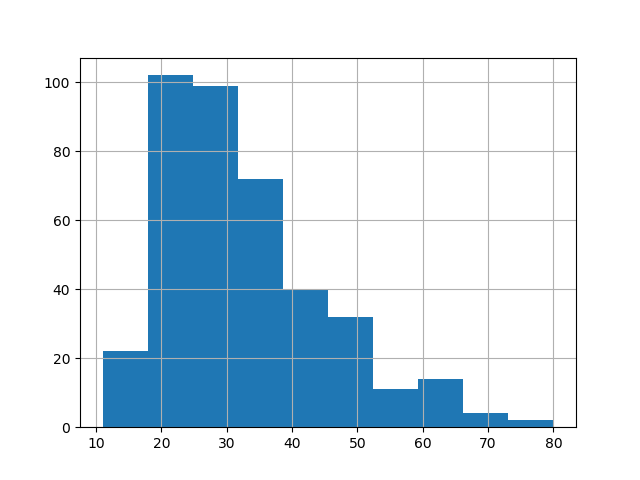

In [49]:
df[df['Title'] == 'Mr']['Age'].hist()

ini kalo di Histogram,  distribusinya seperti ini, dan ternyata dist-nya normal

In [50]:
#Change Mlle and Ms to Miss
mask = ((df['Title'] == 'Mlle')|
        (df['Title'] == 'Ms'))
df.loc[mask,'Title'] = 'Miss'

#Change Mme to Mrs
mask = (df['Title'] == 'Mme')
df.loc[mask,'Title'] = 'Mrs'
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


Yang Berlayar dengan Titanic ini ternyata ada orang prancis sama england seng title e beda tapi artinya sama, ini tak samano. https://forum.wordreference.com/threads/m-mme-mlle.2272213/

In [51]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [52]:
describe_categorical(df)

,Name,Sex,Ticket,Cabin,Embarked,Title
count,891,891,891,204,889,891
unique,891,2,681,147,3,14
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S,Mr
freq,1,577,7,4,644,517


Nah Fungsi itu buat deskripsino yang bukan angka, jadi isinya ya cman itu, tapi cabin itu sudah banyak yang missing, jadi kelihatanya tidak perlu di pake.

In [53]:
new_df = df[['Title', 'Age']].groupby('Title').mean()
new_df

,Age
Title,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167
Miss,21.845638


Groupby cuman pertama di fileter cuma ambil Title sama Age, trz groupby Title di ambil rata ratanya

In [54]:
new_df = new_df.rename(columns={'Age': 'Predicted_Age'})
new_df

,Predicted_Age
Title,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167
Miss,21.845638


In [55]:
df = df.merge(new_df, left_on = "Title", right_index = True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Predicted_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,32.36809
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,32.36809
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,32.36809
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,32.36809
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr,32.36809
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Mr,32.36809
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr,32.36809
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,Mr,32.36809
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Mr,32.36809
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr,32.36809


Merge itu sama kek Joinya Database

In [56]:
df['Age'] = df['Age'].fillna(df['Predicted_Age'])

Yang umurnya NaN di isi dengan prediksi umurnya

# Feature Selection

In [57]:
target = df[['Survived', 'Pclass', 'Sex', 'Age']]
target.head(10)

,Survived,Pclass,Sex,Age
0,0,3,male,22.00000
4,0,3,male,35.00000
5,0,3,male,32.36809
6,0,1,male,54.00000
12,0,3,male,20.00000
13,0,3,male,39.00000
17,1,2,male,32.36809
20,0,2,male,35.00000
21,1,2,male,34.00000
23,1,1,male,28.00000


Sex kelihatanya penting soal e kan nek nde titanic seng cewek di selamatkan sama cowoknya - ugh romance soro, tapi kan sex ini tipenya categorical, sedangkan libnya untuk decision tree dia mintanya angka, jadiii

In [58]:
dummy = pd.get_dummies(target['Sex'])
dummy.head(5)

,female,male
0,0,1
4,0,1
5,0,1
6,0,1
12,0,1


In [59]:
target = pd.concat([target, dummy], axis=1)
target.head(10)

,Survived,Pclass,Sex,Age,female,male
0,0,3,male,22.00000,0,1
4,0,3,male,35.00000,0,1
5,0,3,male,32.36809,0,1
6,0,1,male,54.00000,0,1
12,0,3,male,20.00000,0,1
13,0,3,male,39.00000,0,1
17,1,2,male,32.36809,0,1
20,0,2,male,35.00000,0,1
21,1,2,male,34.00000,0,1
23,1,1,male,28.00000,0,1


In [61]:
target.drop('Sex', axis=1, inplace=True)
target.head(10)

,Survived,Pclass,Age,female,male
0,0,3,22.00000,0,1
4,0,3,35.00000,0,1
5,0,3,32.36809,0,1
6,0,1,54.00000,0,1
12,0,3,20.00000,0,1
13,0,3,39.00000,0,1
17,1,2,32.36809,0,1
20,0,2,35.00000,0,1
21,1,2,34.00000,0,1
23,1,1,28.00000,0,1


# Decision Tree

In [63]:
y = target['Survived']
x = target.drop('Survived', axis=1)

In [64]:
clf = tree.DecisionTreeClassifier()
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
cv = cross_val_score(clf, x, y, cv = 10)
cv

array([ 0.62222222,  0.58888889,  0.86516854,  0.8988764 ,  0.94382022,
        0.83146067,  0.88764045,  0.93258427,  0.52808989,  0.52272727])

<IPython.core.display.Javascript object>


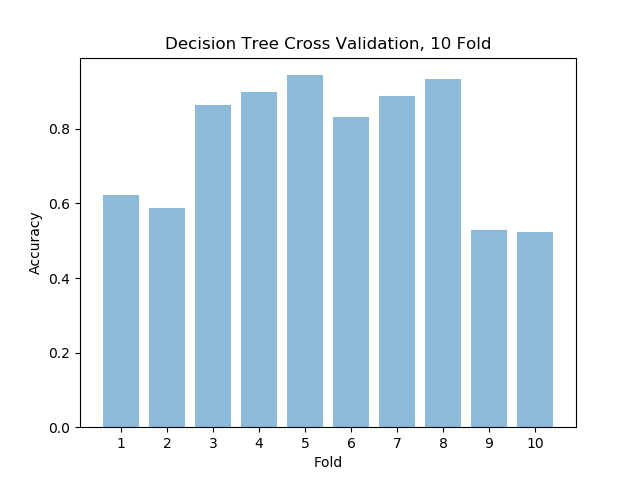

In [69]:
objects = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y_pos = np.arange(len(objects))
performance = cv
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Decision Tree Cross Validation, 10 Fold')
 
plt.show()

In [72]:
print "Average Accuracy: " + str(cv.mean())
print "Deviation: " + str(cv.std())

Average Accuracy: 0.762147883328
Deviation: 0.165413795227


Jadi Akurasi e baru e dee sekitar 76% (Sek Jelek) nah sama Deviasi e 0.1 nek di lihat dr barchart-chartnya masih kurang konsisten hehehe